In [1]:
#This is the implementation of a Iris Classifier using sklearn library
#Using python 3.7.1

#Importing DS standard modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#Importing The Datasets and Analyzinf its characteristics
from sklearn.datasets import load_iris

#Point the model to a variable
iris = load_iris()

#Print Dataset description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#The classifications model possess three alternative class

In [5]:
#Checking the dataset shape
iris.data.shape

(150, 4)

In [6]:
#Spitting the model into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, random_state=0)


In [7]:
#Checking the training dataset shape
print(X_train.shape)
print(Y_train.shape)

(112, 4)
(112,)


In [9]:
#Testing the classification with a Logistic Regression Module
from sklearn.linear_model import LogisticRegression

#Pointing the model to a variable
logreg = LogisticRegression()

#Fitting the model to training datasets
logreg.fit(X_train, Y_train)

#Outputting scores
print(logreg.score(X_test, Y_test))

0.9736842105263158


C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No handles with labels found to put in legend.


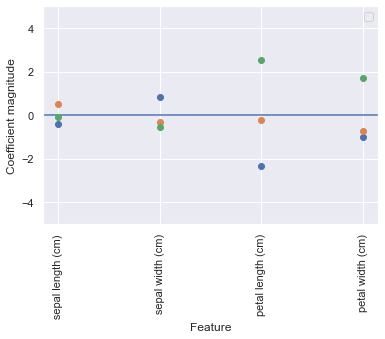

In [10]:
#Plotting Feature Importance for Logistic Regression Model
plt.plot(logreg.coef_.T, 'o')
plt.xticks(range(iris.data.shape[1]), iris.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()


In [14]:
#Importing the scaler to Normalize the training and testing datasets
from sklearn.preprocessing import MinMaxScaler

#Pointing the model to a variable
scaler = MinMaxScaler()

#Transforming the X_Train and X_test datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Outputting the scaled datasets for testing purpose
print("X_train scaled :", X_train_scaled)
print("X_test scaled:", X_test_scaled)

X_train scaled : [[0.44444444 0.41666667 0.53448276 0.58333333]
 [0.41666667 0.25       0.5        0.45833333]
 [0.69444444 0.41666667 0.75862069 0.83333333]
 [0.11111111 0.5        0.03448276 0.04166667]
 [0.72222222 0.45833333 0.68965517 0.91666667]
 [0.19444444 0.625      0.0862069  0.20833333]
 [0.30555556 0.70833333 0.06896552 0.04166667]
 [0.19444444 0.         0.4137931  0.375     ]
 [0.61111111 0.41666667 0.75862069 0.70833333]
 [0.66666667 0.54166667 0.79310345 1.        ]
 [0.47222222 0.08333333 0.67241379 0.58333333]
 [0.66666667 0.20833333 0.81034483 0.70833333]
 [0.36111111 0.20833333 0.48275862 0.41666667]
 [0.94444444 0.41666667 0.86206897 0.91666667]
 [0.55555556 0.54166667 0.62068966 0.625     ]
 [0.33333333 0.16666667 0.46551724 0.41666667]
 [0.55555556 0.29166667 0.65517241 0.70833333]
 [0.55555556 0.33333333 0.68965517 0.58333333]
 [0.16666667 0.20833333 0.5862069  0.66666667]
 [0.55555556 0.20833333 0.67241379 0.75      ]
 [0.75       0.5        0.62068966 0.541666

In [15]:
#Training the model with normalize data
logreg.fit(X_train_scaled, Y_train)

#Outputting scores
print(logreg.score(X_test_scaled,  Y_test))

0.8157894736842105


In [16]:
#Logistic Regression did not perform better with normalized data

In [17]:
#Try Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fitting the model to training datasets
scaler.fit(X_train, Y_train)

#Transforming the X_train and X_test datasets
X_train_scalled =scaler.transform(X_train)

X_test_scalled = scaler.transform(X_test)

In [18]:
#training  the model with scaled data
logreg.fit(X_train_scalled, Y_train)
logreg.score(X_test_scalled, Y_test)

0.9736842105263158

In [19]:
#Analyzing predictions score with cross_val_score 

from sklearn.model_selection import cross_val_score

cross = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(cross)

C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [20]:
#Making predictions with KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#Pointing the model to a variable
KN = KNeighborsClassifier(n_neighbors=3)

#Fitting the training data
KN.fit(X_train, Y_train)

#outputting the score
KN.score(X_test,  Y_test)


0.9736842105263158

In [21]:
#Training the model with normalized data
KN.fit(X_train_scaled, Y_train)

#Outputting scores
KN.score(X_test_scaled, Y_test)

0.9736842105263158

In [22]:
#Normalizing the data doesn't make any difference

In [23]:
#Making predictions with MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, Y_train)

mlp.score(X_test, Y_test)

0.9736842105263158

In [25]:
#Checking the scores with cross_val_score and Accuracy_score
cross = cross_val_score(mlp, iris.data, iris.target, cv =3)
print(cross)

[1.   0.98 0.98]


In [29]:
from sklearn.metrics import accuracy_score

pred =  mlp.predict(X_train)
acc = accuracy_score(pred, Y_test)

ValueError: Found input variables with inconsistent numbers of samples: [112, 38]

In [32]:
#Using Random Forest Classifier to make predictions
from sklearn.ensemble import RandomForestClassifier

Rnd = RandomForestClassifier()
Rnd.fit(X_train, Y_train)
Rnd.score(X_test, Y_test)

0.9736842105263158